# Euro Data Cube - xcube Validation

## Test 3 xcube Time-series

This validation test demonstrates the following features: 
* Time-series capbilites:
    * list time stamps for variable
    * compute time-series for point
    * compute time-series for geometry
   

## Requirements

To run this notebook you need your [Sentinel Hub API authentication](https://docs.sentinel-hub.com/api/latest/#/API/authentication) information and a Python environment
with `xcube` and the xcube plugin `xcube_sh` installed.

Checkout [xcube sources](https://github.com/dcs4cop/xcube) and follow instructions in its [README.md](https://github.com/dcs4cop/xcube/blob/master/README.md).

After activating the `xcube` Python environment, install additional packages required for Sentinel Hub API authentication:

```bash
$ conda activate xcube
(xcube) $ conda install -c conda-forge oauthlib
(xcube) $ pip install requests_oauthlib
```

Then checkout [xcube_sh sources](https://gitext.sinergise.com/dcfs/xcube-dcfs.git) and follow instructions in its [README.md](https://gitext.sinergise.com/dcfs/xcube-dcfs/blob/master/README.md).

Your Sentinel Hub API credentials can be passed as keyword arguments to the `SentinelHub` constructor (see below) or passed as environment variables (preferred): 

```bash
(xcube) $ export SH_CLIENT_ID=<your-id>
(xcube) $ export SH_CLIENT_SECRET=<your-secret>
```


In [1]:
from xcube_sh.config import CubeConfig
from xcube_sh.cube import open_cube
from xcube_sh.sentinelhub import SentinelHub
import xarray as xr
from xcube.core.geom import mask_dataset_by_geometry
from xcube.core.geom import rasterize_features
import matplotlib.pyplot as plt


In [2]:
import gdal

In [3]:
x1 = 10.11 # degree
y1 = 54.17  # degree
x2 = 10.20 # degree
y2 = 54.22  # degree

bbox = x1, y1, x2, y2

In [4]:
spatial_res = 0.00018   # = 20.038 meters in degree

In [5]:
cube_config = CubeConfig(dataset_name='S2L2A',
                         band_names=['B04'],
                         tile_size=[512, 512],
                         bbox=bbox,
                         spatial_res=spatial_res,
                         time_range=['2019-01-01', '2019-12-31'],
                         time_tolerance='1d')  

In [6]:
cube = open_cube(cube_config)

In [7]:
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 278, lon: 500, time: 145)
Coordinates:
  * lat        (lat) float64 54.22 54.22 54.22 54.22 ... 54.17 54.17 54.17 54.17
  * lon        (lon) float64 10.11 10.11 10.11 10.11 ... 10.2 10.2 10.2 10.2
  * time       (time) datetime64[ns] 2019-01-03T10:45:37 ... 2019-12-29T10:45:38
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(145, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 278, 500), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2020-11-17T15:11:32.778798
    processing_level:        L2A
    time_coverage_start:     2019-01-03T10:45:37+00:00
    time_coverage_end:       2019-12-29T10:45:38+00:00
    time_coverage_duration:  P360DT0H0M1S
    geospatial_lon_min:      10.11
    geospatial_lat_min:      54.17
    geospatial_lon_max:      10.2
    geospatial_lat_max:      54.220040000000004

## List time stamps vor observations

In [8]:
cube.time.data

array(['2019-01-03T10:45:37.000000000', '2019-01-05T10:35:45.000000000',
       '2019-01-08T10:45:42.000000000', '2019-01-10T10:35:42.000000000',
       '2019-01-13T10:45:39.000000000', '2019-01-15T10:35:46.000000000',
       '2019-01-18T10:45:43.000000000', '2019-01-20T10:35:43.000000000',
       '2019-01-23T10:45:40.000000000', '2019-01-25T10:35:47.000000000',
       '2019-01-28T10:45:43.000000000', '2019-01-30T10:35:43.000000000',
       '2019-02-02T10:45:40.000000000', '2019-02-04T10:35:47.000000000',
       '2019-02-07T10:45:43.000000000', '2019-02-09T10:35:43.000000000',
       '2019-02-12T10:45:40.000000000', '2019-02-14T10:35:46.000000000',
       '2019-02-17T10:45:43.000000000', '2019-02-19T10:35:43.000000000',
       '2019-02-22T10:54:14.000000000', '2019-02-24T10:52:10.000000000',
       '2019-02-27T10:48:37.000000000', '2019-03-01T10:37:12.000000000',
       '2019-03-04T10:46:02.000000000', '2019-03-06T10:46:21.000000000',
       '2019-03-09T10:45:44.000000000', '2019-03-11

In [12]:
# cube.to_zarr('ts_cube.zarr')

In [13]:
cube = xr.open_zarr("ts_cube.zarr").chunk(dict(time=cube.time.size,lon=10,lat=10))

## Get time-series for point, nearest neighbour and spatially interpolated

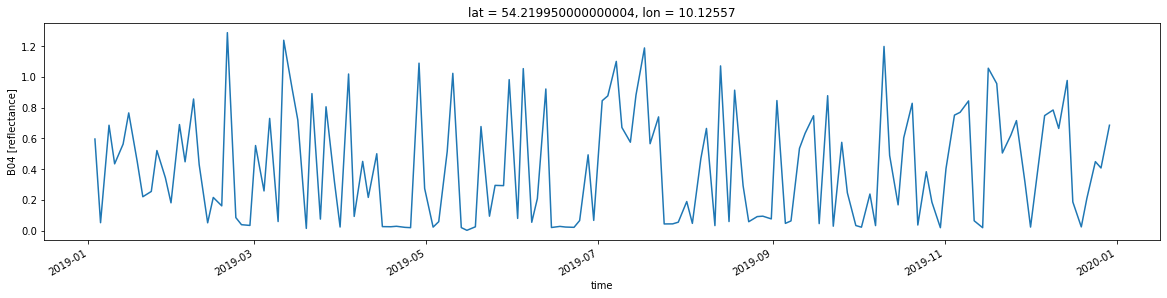

In [14]:
cube.B04.sel(lon=10.1256, lat=54.237,method='nearest').plot(figsize=[20,4])

## Time-series for geometry

In [15]:
import IPython.display

In [16]:
aoi = dict(type='Polygon', coordinates=[[[10.14,54.20],[10.14,54.22],[10.18,54.19],[10.19,54.18],[10.14,54.20]]] )

In [17]:
IPython.display.GeoJSON(aoi)

<IPython.display.GeoJSON object>

In [18]:
aoi

{'type': 'Polygon',
 'coordinates': [[[10.14, 54.2],
   [10.14, 54.22],
   [10.18, 54.19],
   [10.19, 54.18],
   [10.14, 54.2]]]}

In [19]:
masked_cube = mask_dataset_by_geometry(cube,aoi)

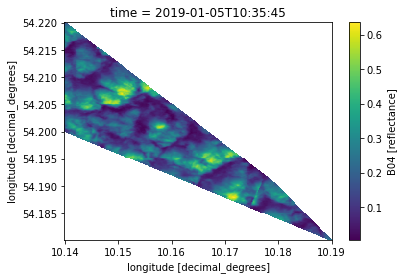

In [20]:
masked_cube.B04.isel(time=1).plot.imshow()

In [21]:
masked_cube.mean().compute()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    B04      float32 0.43802604